<a href="https://colab.research.google.com/github/Amoghakrao/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction_Amogha_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mobile Price Range Prediction**

**In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.**

## **Data Description** -

**Battery_power** - Total energy a battery can store in one time measured in mAh

**Blue** - Has bluetooth or not

**Clock_speed** - speed at which microprocessor executes instructions

**Dual_sim** - Has dual sim support or not

**Fc** - Front Camera mega pixels

**Four_g** - Has 4G or not

**Int_memory** - Internal Memory in Gigabytes

**M_dep** - Mobile Depth in cm

**Mobile_wt**- Weight of mobile phone

**N_cores** - Number of cores of processor

**Pc** - Primary Camera mega pixels

**Px_height** - Pixel Resolution Height

**Px_width** - Pixel Resolution Width

**Ram** - Random Access Memory in Mega Bytes

**Sc_h** - Screen Height of mobile in cm

**Sc_w** - Screen Width of mobile in cm

**Talk_time** - longest time that a single battery charge will last when you are

**Three_g** - Has 3G or not

**Touch_screen** - Has touch screen or not

**Wifi** - Has wifi or not

**Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),2(high cost) and 3(very high cost).

*   **IMPORTING LIBRARIES**


In [26]:
# IMPORTING THE LIBRARIES AND MODULES
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [27]:
#LET'S MOUNT THE GOOGLE DRIVE.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
#LOADING OUR DATASET
mobile_data = pd.read_csv('/content/drive/MyDrive/Mobile Price Range prediction - Amogha K/data_mobile_price_range.csv')

In [29]:
# LET SEE THE FIRST FIVE ROWS OF THE DATASET.
mobile_data.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [30]:
# LAST FIVE ROWS OF THE DATASET.
mobile_data.tail(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1990,1617,1,2.4,0,8,1,36,0.8,85,1,...,743,1426,296,5,3,7,1,0,0,0
1991,1882,0,2.0,0,11,1,44,0.8,113,8,...,4,743,3579,19,8,20,1,1,0,3
1992,674,1,2.9,1,1,0,21,0.2,198,3,...,576,1809,1180,6,3,4,1,1,1,0
1993,1467,1,0.5,0,0,0,18,0.6,122,5,...,888,1099,3962,15,11,5,1,1,1,3
1994,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,3
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3




*   **To view a small sample of a Series or the DataFrame object, use the head() and the tail() methods.**





In [31]:
#HECKING THE NUMBER OF ROWS AND COLUMS USING SHAPE METHOD.
print("The shape of our dataset is : ", mobile_data.shape)

The shape of our dataset is :  (2000, 21)




*   **The shape method helps us get an idea of the number of rows and columns present in our data**

*   **In our data set we have 2000 rows and 21 colums**



In [32]:
#LEST'S UNDERSTAND OUR COLUMN NAMES IN OUR DATA SET.
mobile_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [33]:
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc



*   **We can quickly determine the data type and null values in our dataframes by using the info() method.** 

*   **We don't have any object data type in our data set.**

*   **Price_range is our target variable.**



In [34]:
# CHECKING THE MEAN ,MEDIAN , MODE , STANDARD DEVIATION USING DESCRIBE FUNCTION 
mobile_data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [35]:
#CHECKING FOR DUPLICATE VALUES

len(mobile_data[mobile_data.duplicated()])

0



* **There are no duplicate values in our data set**


In [36]:
#CHECKING FOR NULL VALUES

mobile_data.isnull().sum().sort_values(ascending = False)

battery_power    0
px_height        0
wifi             0
touch_screen     0
three_g          0
talk_time        0
sc_w             0
sc_h             0
ram              0
px_width         0
pc               0
blue             0
n_cores          0
mobile_wt        0
m_dep            0
int_memory       0
four_g           0
fc               0
dual_sim         0
clock_speed      0
price_range      0
dtype: int64


*    **As we can see, in our mobile_data, we have zero null values. which means the data was well maintained.**


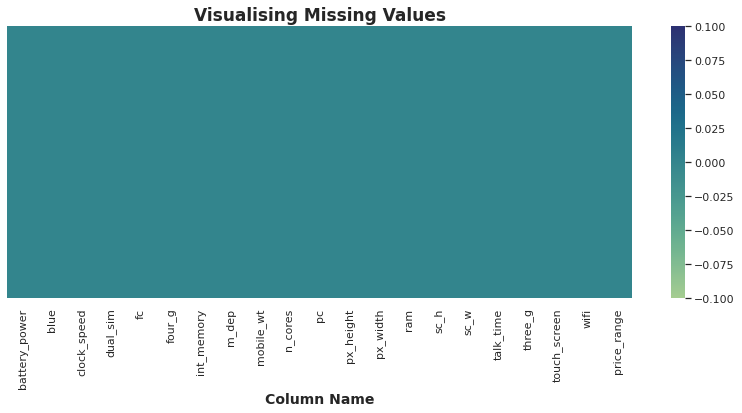

In [37]:
# Checking missing values
plt.figure(figsize=(14, 5))
sns.heatmap(mobile_data.isnull(), cmap='crest', yticklabels=False)
plt.xlabel("Column Name", size=14, weight="bold")
plt.title("Visualising Missing Values",fontweight="bold",size=17)
plt.show()

**The target variable labels with acooridng to the values.**

*  **0=Low cost**
*  **1=Medium cost**
*  **2=Higgh cost**
*  **3=Very high cost**

# **EDA( Exploratory Data Analysis)**

In [38]:
# lets have look at our target variable's counts
price_range_counts=mobile_data['price_range'].value_counts()
price_range_counts

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

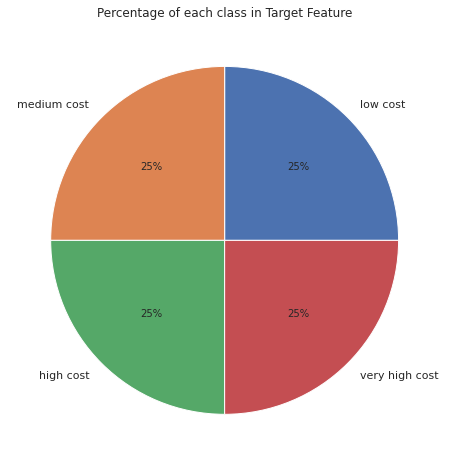

In [39]:
labels = ["low cost", "medium cost", "high cost", "very high cost"]
fig,ax=plt.subplots(figsize=(15,8))
plt.pie(price_range_counts, labels=labels, autopct='%.0f%%')
plt.title('Percentage of each class in Target Feature')
plt.show()



*   **Each class has an almost equal number of observations for each category. So our target feature is well balanced. The accuracy score will be the best evaluation metric for us to select the model.**


*   **We can see that our target varibale is equally distributed.**


* **There is no need for oversampling or undersampling beacause our data is balanced.**



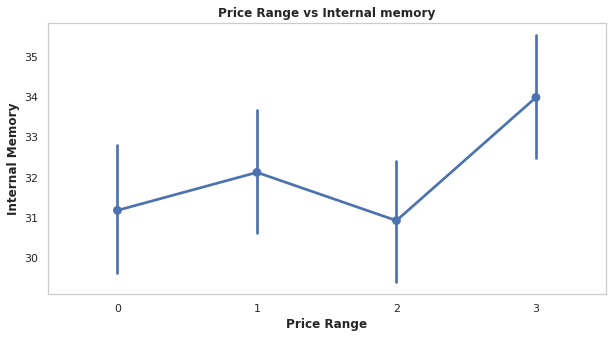

In [68]:
#Price Range vs Internal memory
plt.figure(figsize=(10,5))
sns.pointplot(x="price_range",y="int_memory", data=mobile_data)
plt.xlabel('Price Range', fontweight ='bold')
plt.ylabel('Internal Memory', fontweight ='bold')
# giving title to the plot
plt.title('Price Range vs Internal memory', fontweight ='bold')
plt.grid(False)
plt.show()

### **Percentage of phones which supports 3G**

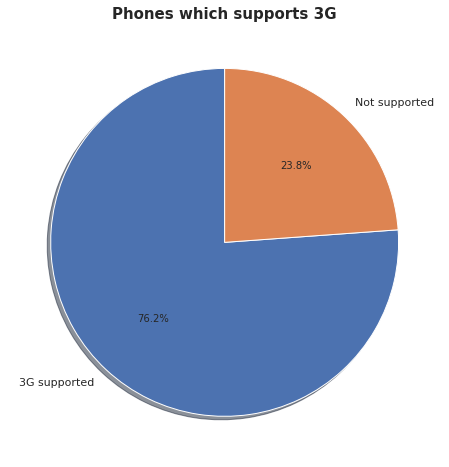

In [41]:
#percentage of phones which support 3g
labels = ["3G supported",'Not supported']
values=mobile_data['three_g'].value_counts().values
fig1, ax1 = plt.subplots(figsize=(15,8))
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Phones which supports 3G', fontweight ='bold' , size = 15)
plt.show()

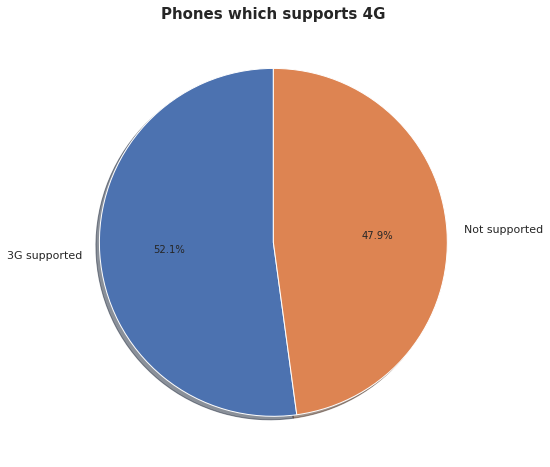

In [42]:
#percentage of phones which support 3g
labels = ["3G supported",'Not supported']
values=mobile_data['four_g'].value_counts().values
fig1, ax1 = plt.subplots(figsize=(15,8))
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Phones which supports 4G', fontweight ='bold' , size = 15)
plt.show()

### **Relationship between Price Range & 3G/4G**

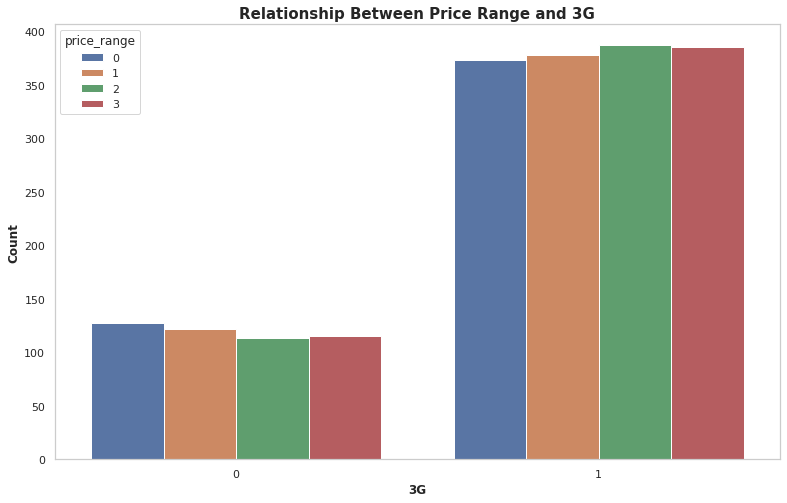

In [69]:
plt.figure(figsize = (13,8))
sns.countplot(mobile_data['three_g'] , hue = mobile_data['price_range'])
plt.xlabel('3G', fontweight ='bold')
plt.ylabel('Count', fontweight ='bold')
plt.title('Relationship Between Price Range and 3G', fontweight ='bold' , size = 15)
plt.grid(False)
plt.show()

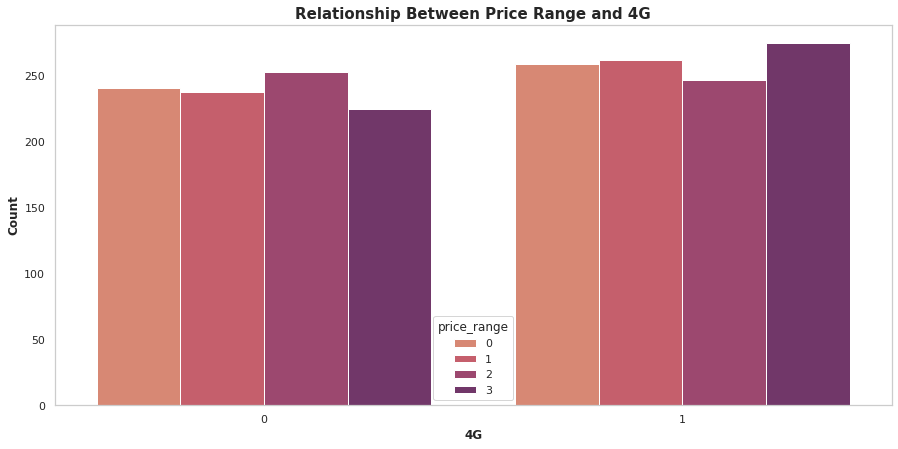

In [70]:

plt.figure(figsize = (15,7))
sns.countplot(mobile_data['four_g'] , hue = mobile_data['price_range'] , palette = 'flare')
plt.xlabel('4G', fontweight ='bold')
plt.ylabel('Count', fontweight ='bold')
plt.title('Relationship Between Price Range and 4G', fontweight ='bold' , size = 15)
plt.grid(False)
plt.show()

### **Price Range vs Battery power**

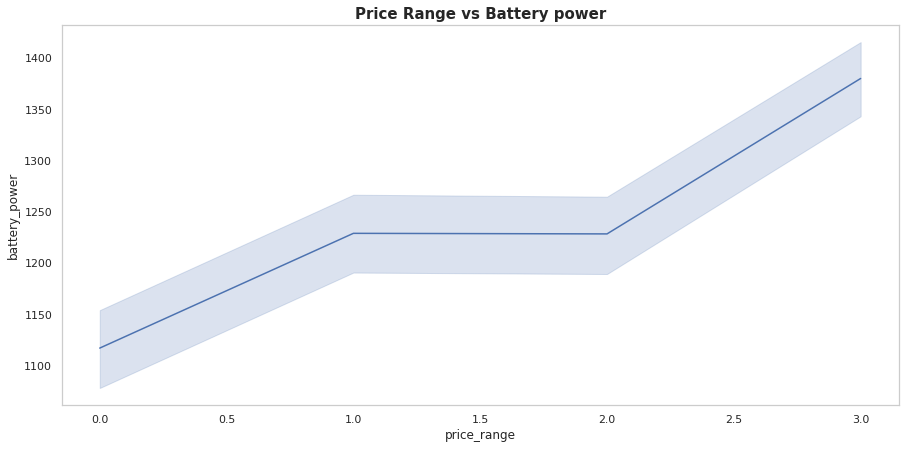

In [71]:
plt.figure(figsize = (15,7))
#sns.boxplot(x="price_range", y="battery_power", data=mobile_data)
sns.lineplot(x="price_range",y="battery_power", data=mobile_data)
plt.title('Price Range vs Battery power',fontweight ='bold' , size = 15)
plt.grid(False)
plt.show()

* **Mobiles with battery power greater than 1300 mAh have a very high cost, and mobiles with battery power between 1200 and 1300 mAh fall into the medium and high cost categories.**

### **Number of Phones vs Camera megapixels of front and primary camera**

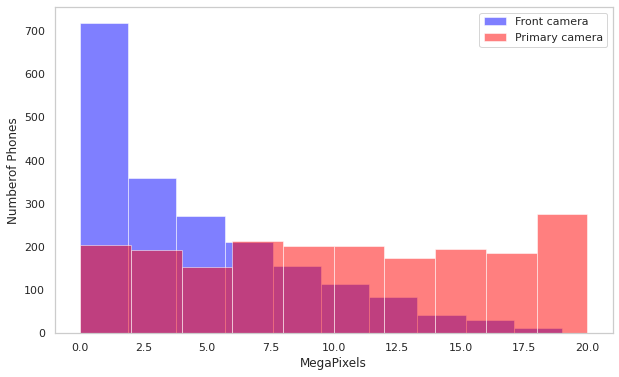

In [72]:
plt.figure(figsize=(10,6))
mobile_data['fc'].hist(alpha=0.5,color='blue',label='Front camera')
mobile_data['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.xlabel('MegaPixels')
plt.ylabel('Numberof Phones')
plt.grid(False)
plt.legend()
plt.show()

### **Mobile Weght vs Price range**

<Figure size 1440x1152 with 0 Axes>

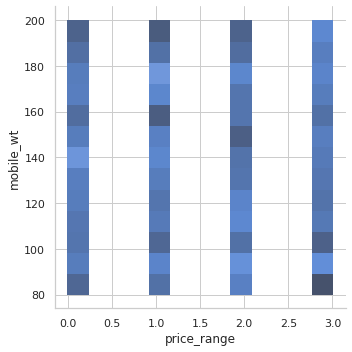

In [73]:
plt.figure(figsize=(20,16))
sns.displot(x="price_range", y="mobile_wt", data=mobile_data)
#sns.jointplot(x='mobile_wt',y='price_range',data=data,kind='kde')

### **Talk time vs Price range**

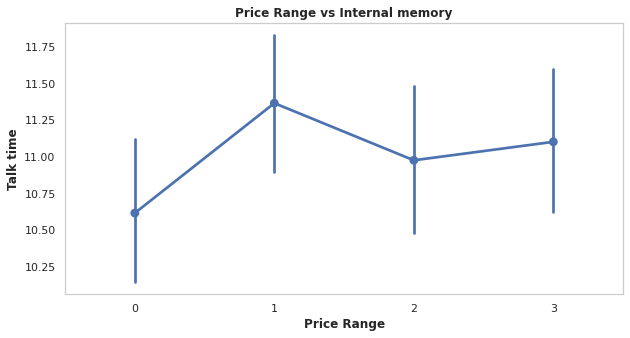

In [74]:
plt.figure(figsize=(10,5))
sns.pointplot(x="price_range",y="talk_time", data=mobile_data)
plt.xlabel('Price Range', fontweight ='bold')
plt.ylabel('Talk time', fontweight ='bold')
# giving title to the plot
plt.grid(False)
plt.title('Price Range vs Internal memory', fontweight ='bold')
plt.show()

In [76]:

numeric_features = list(mobile_data.describe().columns)
numeric_features
     

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

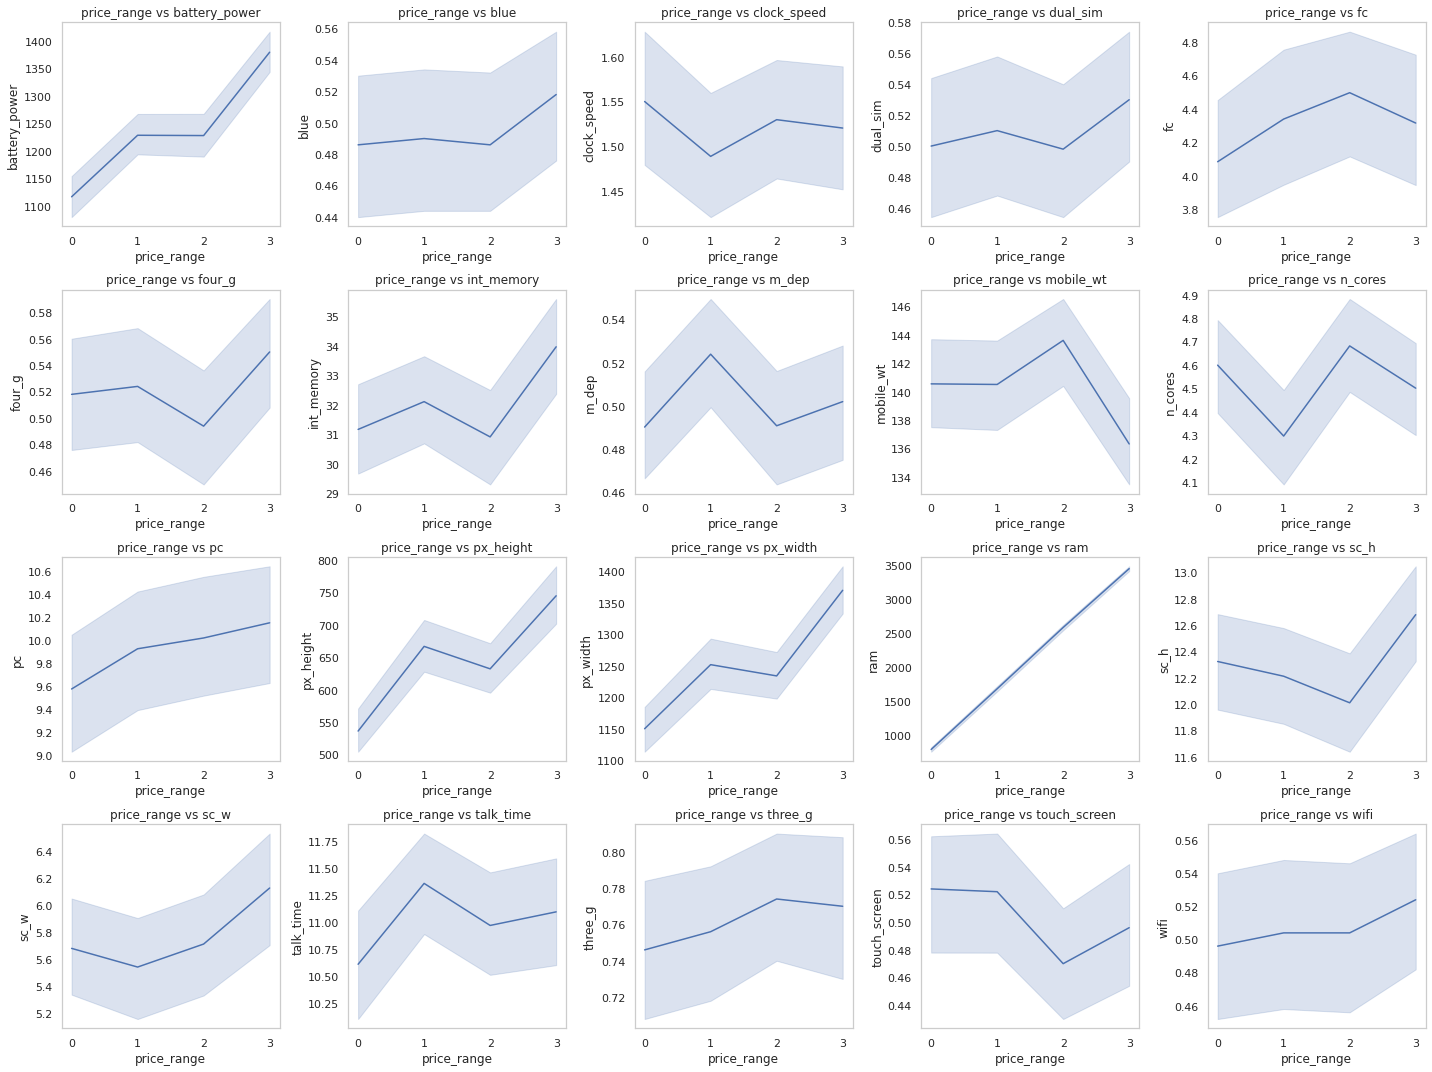

In [78]:

#cheking how feature effect the price range.
rows=4   
cols=5
counter=1
fig = plt.figure(figsize=(20, 15)) 
for col in numeric_features:
  if col not in ['price_range']:
    
    plt.subplot(rows,cols,counter)   
    sns.lineplot(x=mobile_data['price_range'], y=mobile_data[col])
    plt.xlabel('price_range')
    plt.ylabel(col)
    plt.grid(False)
    plt.title(f'price_range vs {col}')
    counter=counter+1
    plt.tight_layout()
        



* **The power range of class 1 and class 2 batteries is nearly identical. As battery power increases, the price also increases, which is quite obvious..**
*   **Mobiles in a very high price range (Class 3) have less weight compared to other classes. That means as the weight of mobiles decreases, their price increases.**


* **Mobile phones with the largest screen height and width are extremely expensive. We can see in the linechart of sc_width and sc_height from class 2 that screen width and height start increasing with price. A similar case is with px_height and px_width. When the resolution of the screen increases, the price also increases.**
*   **RAM has a clear relationship with price range.**





### **Lets check out the distribution of our each features**

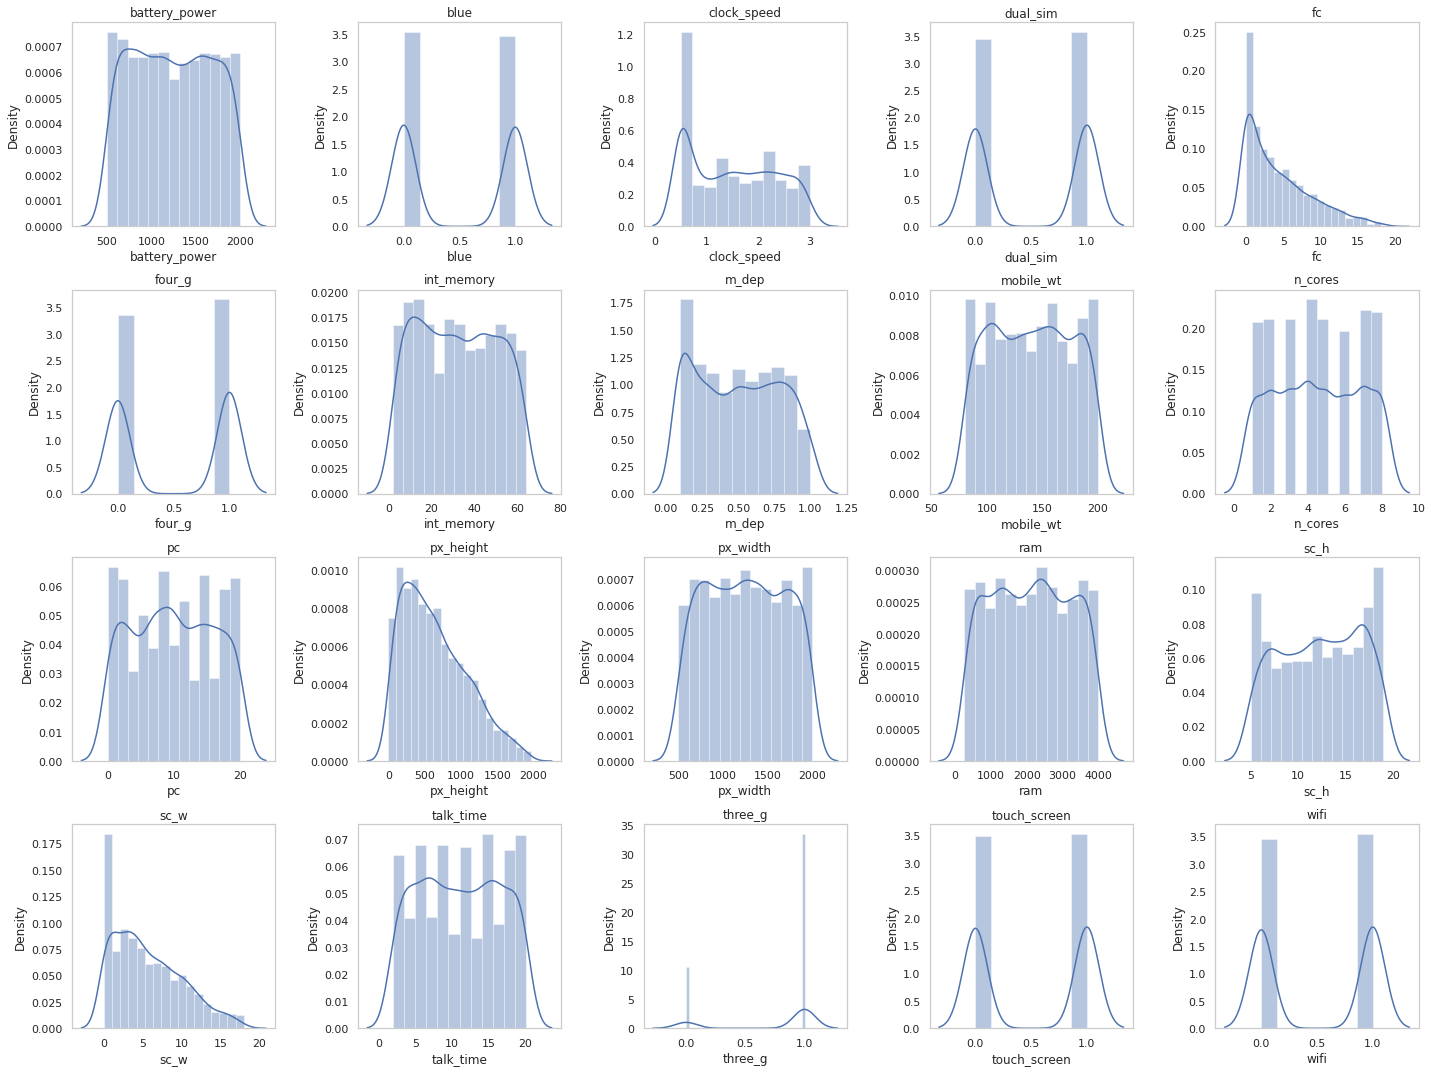

In [80]:
#printing displots to analyze the distribution of all numerical features
# plot a bar plot for each numerical feature count (except store)
rows=4   
cols=5
counter=1
fig = plt.figure(figsize=(20, 15)) 

for col in numeric_features[:-1]:
    plt.subplot(rows,cols,counter)
    feature = mobile_data[col]
    sns.distplot(feature)    
    plt.title(col)
    plt.grid(False)
    counter=counter+1
    plt.tight_layout()
     



*  **Most of our features look similar to normal distribution and some features have multi mode because one of those columns has categories, which hold values like 0 or 1.**




### **Outlier Detection**

In [81]:
#outlier detection
outlier_list = ['clock_speed','fc','pc','sc_h','sc_w','int_memory','battery_power','px_height','px_width','ram']

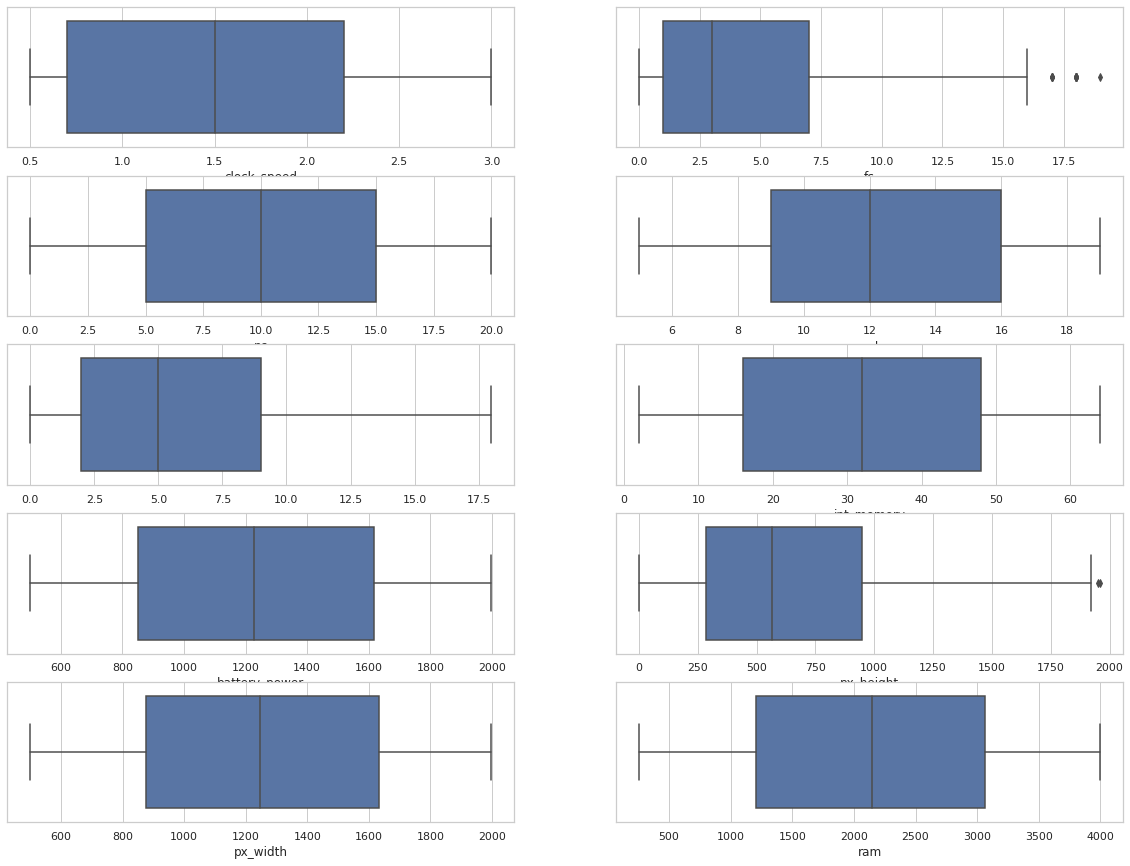

In [82]:
plt.figure(figsize=(20,15))
for i in range(len(outlier_list)):
  plt.subplot(5,2,i+1)
  sns.boxplot(mobile_data[outlier_list[i]])



*   **As we see, there are not too much outliers.**

